In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: ________

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



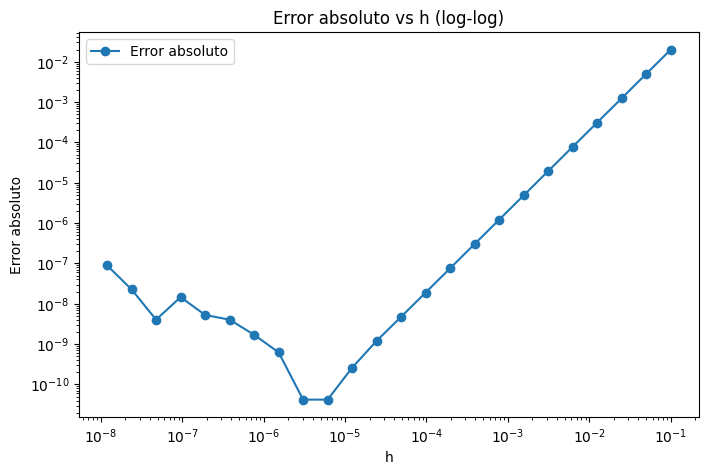

In [9]:
# Aqui va su código
def derivada(f, x, tol=1e-8):
    h = 0.1
    exacta = f(x) * np.log(3)

    h_valores = []
    derivadas = []
    errores = []

    while h > tol:
        deriv = (f(x + h) - f(x - h)) / (2 * h)
        error = abs(deriv - exacta)

        h_valores.append(h)
        derivadas.append(deriv)
        errores.append(error)

        h /= 2

    return derivadas, h_valores, errores

# Función original f(x) = 3^x
f = lambda x: 3**x

# Evaluamos en x = 2
valor_derivada, h_vals, errores = derivada(f, 2)

# Gráfico log-log del error
plt.figure(figsize=(8,5))
plt.loglog(h_vals, errores, marker='o', label='Error absoluto')
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.title("Error absoluto vs h (log-log)")
plt.legend()
plt.show()

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



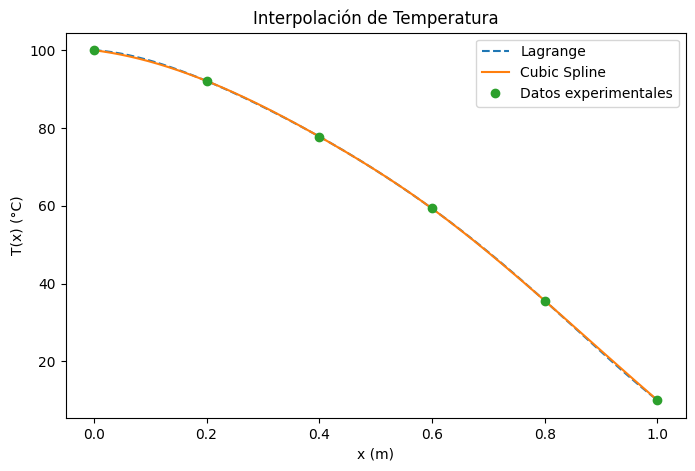

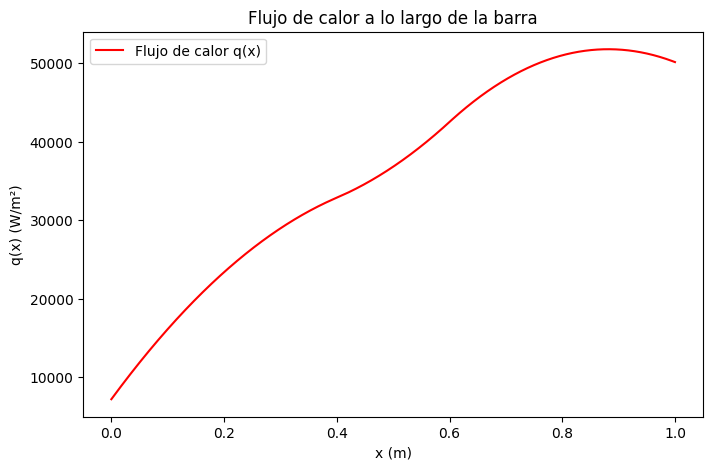

In [8]:
# Aquí va su código
# Datos
x_dat = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
T_dat = np.array([100.0, 92.1, 77.8, 59.3, 35.6, 10.0])

# a. Polinomio de Lagrange
poly_lagrange = lagrange(x_dat, T_dat)

# b. Spline cúbico y gráfico comparativo
x_fina = np.linspace(0, 1, 1000)
T_lagrange = poly_lagrange(x_fina)
spline = CubicSpline(x_dat, T_dat)
T_spline = spline(x_fina)

plt.figure(figsize=(8,5))
plt.plot(x_fina, T_lagrange, label='Lagrange', linestyle='--')
plt.plot(x_fina, T_spline, label='Cubic Spline')
plt.plot(x_dat, T_dat, 'o', label='Datos experimentales')
plt.xlabel("x (m)")
plt.ylabel("T(x) (°C)")
plt.title("Interpolación de Temperatura")
plt.legend()
plt.show()

# c. Gradiente térmico usando spline y np.gradient
x_grad = np.linspace(0, 1, int(1/1e-4) + 1)
T_interp = spline(x_grad)
dTdx = np.gradient(T_interp, 1e-4)

# d. Flujo de calor q(x) = -k * dT/dx
k = 401  # W/m·K para el cobre
q = - k * dTdx

# Gráfico del flujo de calor
plt.figure(figsize=(8,5))
plt.plot(x_grad, q, label='Flujo de calor q(x)', color='red')
plt.xlabel("x (m)")
plt.ylabel("q(x) (W/m²)")
plt.title("Flujo de calor a lo largo de la barra")
plt.legend()
plt.show ()

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [22]:
# Aquí va su código
# Densidad: ρ(x, y) = x*y
def rho(x, y):
    return x * y

# a. Integración iterativa con quad
def integrand_y(y, x):
    return rho(x, y)

def integrand_x(x):
    result, _ = quad(integrand_y, 0, 3 - x, args=(x,))
    return result

masa_iter = quad(integrand_x, 0, 3)

# Ahora con dblquad
masa_dblquad = dblquad(rho, 0, 3, lambda x: 0, lambda x: 3 - x)

print(f'Este es el valor de la masa calculado por quad { masa_iter[0]} y este por dblquad { masa_dblquad[0]}')
# b. Centro de masa
# rho con x^2
def x_rho(x, y):
    return x * x * y

# rho con y^2
def y_rho(x, y):
    return x * y * y

M_y= dblquad(x_rho,0,3,lambda x: 0,lambda x: 3 - x)
M_x=dblquad(y_rho,0,3,lambda x: 0,lambda x: 3 - x)

x_cen= M_y[0]/masa_dblquad[0]
y_cen= M_x[0]/masa_dblquad[0]

print(f'El centro de masa es: {x_cen},{y_cen}')

# Momento de inercia en x
def yy_rho(x,y):
  return x * y**2 * y

I_x= dblquad(yy_rho,0,3,lambda x: 0,lambda x: 3 - x)
print(f'El momento de inercia en x es:{ I_x[0]}')

Este es el valor de la masa calculado por quad 3.375000000000001 y este por dblquad 3.375000000000001
El centro de masa es: 1.1999999999999997,1.1999999999999997
El momento de inercia en x es:6.075000000000001
